In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
# 한글 폰트 설정
from matplotlib import font_manager, rc
import platform

your_os = platform.system()
if your_os == 'Linux':
    rc('font', family = 'NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family = font_name)
elif your_os == 'Darwin':
    rc('font', family = 'AppleGothic')
rc('axes', unicode_minus = False)

In [3]:
df1 = pd.read_csv('서울시_자치구별_1인가구수.csv', encoding='cp949', index_col = 0)
df1

,2019,2020,2021,2022
자치구별(2),,,,
종로구,24671,25983,27308,28424
중구,22078,22818,24544,25247
용산구,35148,36881,39270,41437
성동구,41488,42585,44946,46548
광진구,58714,62301,66140,69391
동대문구,58152,60925,65290,68169
중랑구,52196,56605,60487,64334
성북구,57832,61510,64985,67222
강북구,42791,45685,48428,51134


In [4]:
df2 = pd.read_csv('서울시_자치구별_인구수.csv', encoding='cp949', index_col = 0)
df2

,2019,2020,2021,2022
동별(2),,,,
종로구,161869,158996,153789,152211
중구,136488,134635,131787,130785
용산구,245185,244645,237285,233284
성동구,308979,300505,292672,288234
광진구,366972,360109,352627,351252
동대문구,363023,357014,352006,353601
중랑구,402024,399562,391885,390140
성북구,454744,447056,440142,441984
강북구,317695,311569,302563,297702


In [16]:
# '전체 인구수 대비 1인가구수의 비율' 계산
ratio_df = df1.div(df2) * 100
ratio_df = ratio_df.rename_axis(mapper='인구수대비 1인가구(%)',axis=1)
ratio_df = ratio_df.rename_axis(mapper='자치구',axis=0)
ratio_df = ratio_df.sort_index()
ratio_df

인구수대비 1인가구(%),2019,2020,2021,2022
자치구,,,,
강남구,12.008709,12.682357,13.385273,13.776182
강동구,10.260905,10.844012,12.199017,12.876559
강북구,13.469208,14.662884,16.005923,17.176237
강서구,13.266686,14.707604,16.288584,17.523206
관악구,23.169364,25.349596,27.281064,29.015454
광진구,15.999586,17.300595,18.756363,19.755332
구로구,10.865533,11.785529,13.054328,14.095235
금천구,15.001986,17.081526,19.121568,20.809001
노원구,9.932012,10.708648,11.777351,12.405564


In [17]:


# 2019년 대비 2022년 변화율 계산
change_ratio = ((ratio_df['2022'] - ratio_df['2019']) / ratio_df['2019']) * 100

# 변화율을 df로 만들기
df = pd.DataFrame(change_ratio, columns=['2019년 대비 2022년 변화율'])

# 결과 출력
df

,2019년 대비 2022년 변화율
자치구,
강남구,14.718254
강동구,25.491458
강북구,27.522248
강서구,32.084275
관악구,25.231981
광진구,23.474024
구로구,29.724287
금천구,38.708312
노원구,24.904836


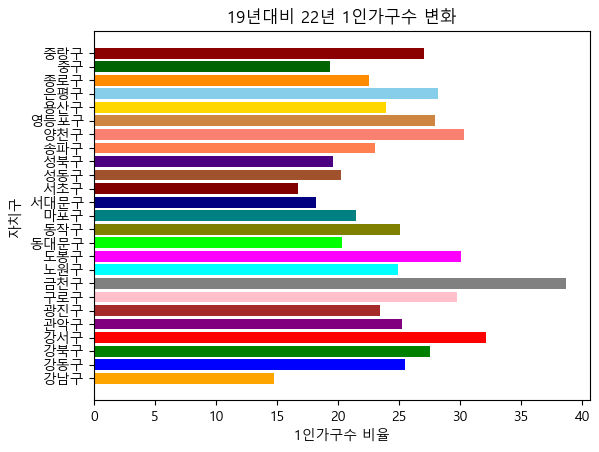

In [26]:
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0

plt.barh(df.index, df['2019년 대비 2022년 변화율'], color=colors)
plt.title('19년대비 22년 1인가구수 변화')
plt.xlabel('1인가구수 비율')
plt.ylabel('자치구')



plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


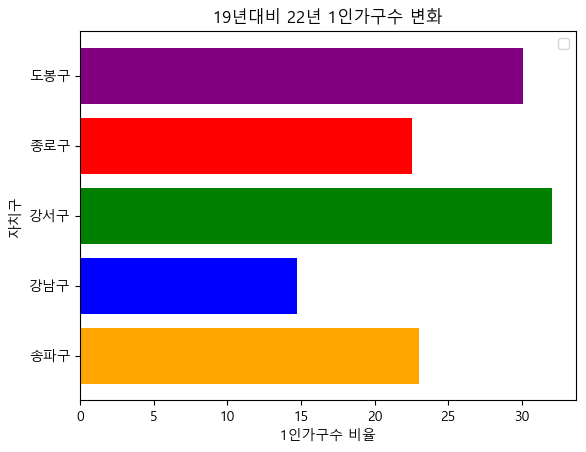

In [24]:
df2 = df.loc[['송파구', '강남구', '강서구', '종로구', '도봉구']]

plt.barh(df2.index, df2['2019년 대비 2022년 변화율'], color=colors)
plt.title('19년대비 22년 1인가구수 변화')
plt.xlabel('1인가구수 비율')
plt.ylabel('자치구')
plt.legend(loc='best', ncol=2)

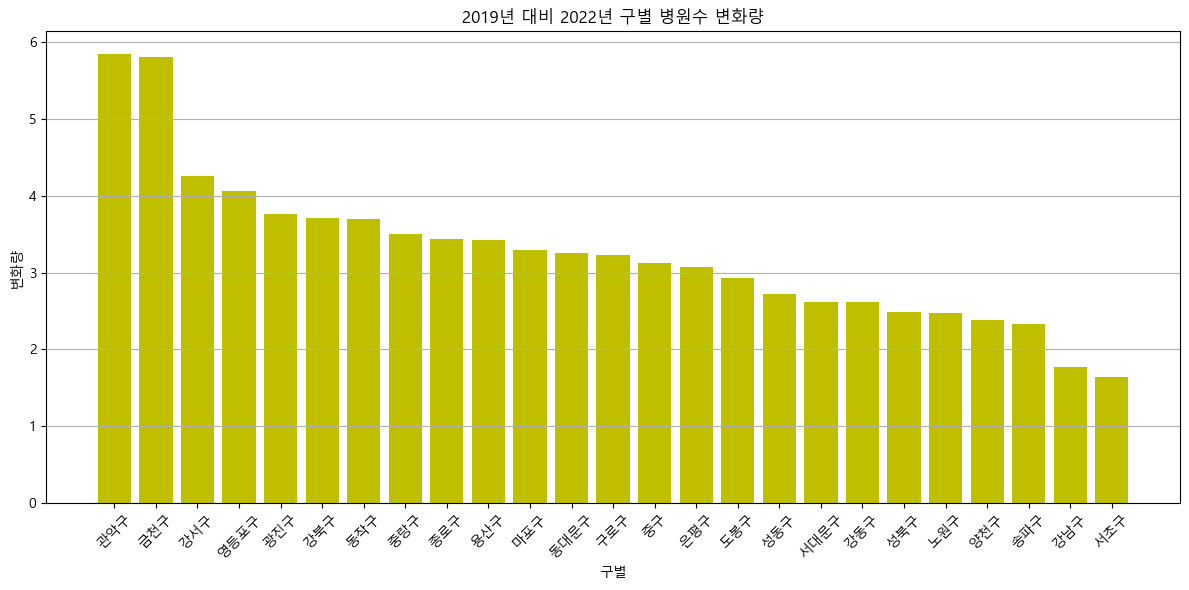

In [28]:
def delta_graph(df):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
    plt.title('2019년 대비 2022년 구별 1인가구수 변화량')
    plt.xlabel('구별')
    plt.ylabel('변화량')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

delta_graph(ratio_df)

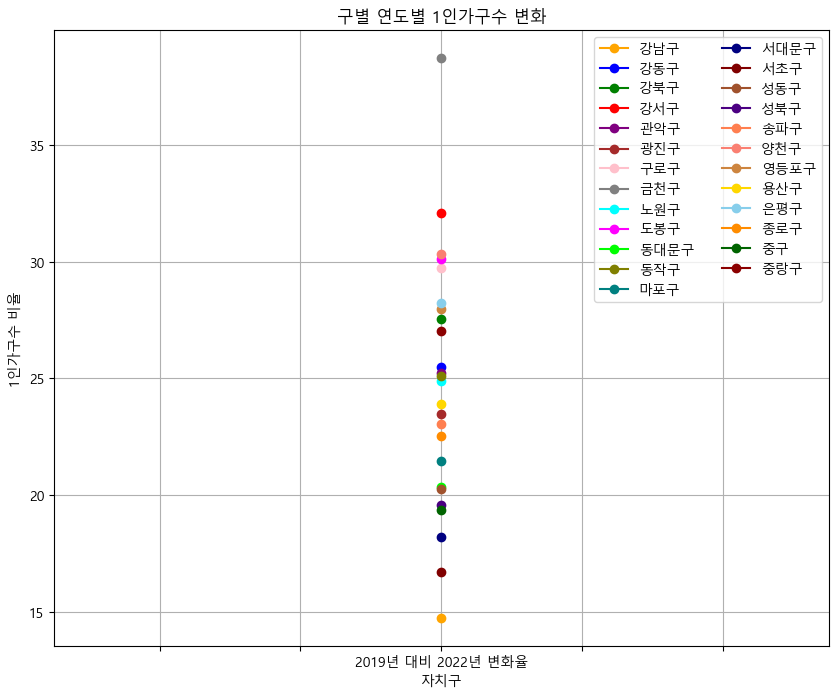

In [6]:
ex1 = df.loc['강남구']
ex2 = df.loc['강동구']
ex3 = df.loc['강북구']
ex4 = df.loc['강서구']
ex5 = df.loc['관악구']
ex6 = df.loc['광진구']
ex7 = df.loc['구로구']
ex8 = df.loc['금천구']
ex9 = df.loc['노원구']
ex10 = df.loc['도봉구']
ex11 = df.loc['동대문구']
ex12 = df.loc['동작구']
ex13 = df.loc['마포구']
ex14 = df.loc['서대문구']
ex15 = df.loc['서초구']
ex16 = df.loc['성동구']
ex17 = df.loc['성북구']
ex18 = df.loc['송파구']
ex19 = df.loc['양천구']
ex20 = df.loc['영등포구']
ex21 = df.loc['용산구']
ex22 = df.loc['은평구']
ex23 = df.loc['종로구']
ex24 = df.loc['중구']
ex25 = df.loc['중랑구']


plt.figure(figsize=(10,8))

ex1.plot(kind='line', marker='o', color='orange', label='강남구')
ex2.plot(kind='line', marker='o', color='blue', label='강동구')
ex3.plot(kind='line', marker='o', color='green', label='강북구')
ex4.plot(kind='line', marker='o', color='red', label='강서구')
ex5.plot(kind='line', marker='o', color='purple', label='관악구')
ex6.plot(kind='line', marker='o', color='brown', label='광진구')
ex7.plot(kind='line', marker='o', color='pink', label='구로구')
ex8.plot(kind='line', marker='o', color='gray', label='금천구')
ex9.plot(kind='line', marker='o', color='cyan', label='노원구')
ex10.plot(kind='line', marker='o', color='magenta', label='도봉구')
ex11.plot(kind='line', marker='o', color='lime', label='동대문구')
ex12.plot(kind='line', marker='o', color='olive', label='동작구')
ex13.plot(kind='line', marker='o', color='teal', label='마포구')
ex14.plot(kind='line', marker='o', color='navy', label='서대문구')
ex15.plot(kind='line', marker='o', color='maroon', label='서초구')
ex16.plot(kind='line', marker='o', color='sienna', label='성동구')
ex17.plot(kind='line', marker='o', color='indigo', label='성북구')
ex18.plot(kind='line', marker='o', color='coral', label='송파구')
ex19.plot(kind='line', marker='o', color='salmon', label='양천구')
ex20.plot(kind='line', marker='o', color='peru', label='영등포구')
ex21.plot(kind='line', marker='o', color='gold', label='용산구')
ex22.plot(kind='line', marker='o', color='skyblue', label='은평구')
ex23.plot(kind='line', marker='o', color='darkorange', label='종로구')
ex24.plot(kind='line', marker='o', color='darkgreen', label='중구')
ex25.plot(kind='line', marker='o', color='darkred', label='중랑구')


plt.title('구별 연도별 1인가구수 변화')
plt.xlabel('자치구')
plt.ylabel('1인가구수 비율')
plt.legend(loc='best', ncol=2)
plt.grid(True)

plt.show()